In this notebook, I will perform modeling using different classification methods and evaluate all models
using confusion matrix and classification matrix.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, \
recall_score, precision_score, accuracy_score, plot_confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, \
GradientBoostingClassifier,AdaBoostClassifier, VotingClassifier
from sklearn.metrics import precision_recall_curve,f1_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB

In [3]:
df=pd.read_csv("./datasets/final_data.csv",index_col=0)

Checking the null data in our dataset

In [4]:
df.isnull().sum()

NPI                                          0
Name                                         0
city                                         0
state                                        0
specialty_description                        0
total_drug_cost                              0
total_claim_count                            0
total_day_supply                             0
Opioid Claim Count                           0
Opioid Prescribing Rate                      0
Long-Acting Opioid Claim Count               0
Long-Acting Opioid Prescribing Rate          0
Total_Payment_Sum                            0
Supplier Rental Indicator                    0
Number of Suppliers                          0
Number of Supplier Beneficiaries             0
Number of Supplier Claims                    0
Average Supplier Submitted Charge            0
Average Supplier Medicare Allow Amount       0
Average Supplier Medicare Payment Amount     0
Average Supplier Medicare Standard Amount    0
is_fraud     

In [5]:
df.columns

Index(['NPI', 'Name', 'city', 'state', 'specialty_description',
       'total_drug_cost', 'total_claim_count', 'total_day_supply',
       'Opioid Claim Count', 'Opioid Prescribing Rate',
       'Long-Acting Opioid Claim Count', 'Long-Acting Opioid Prescribing Rate',
       'Total_Payment_Sum', 'Supplier Rental Indicator', 'Number of Suppliers',
       'Number of Supplier Beneficiaries', 'Number of Supplier Claims',
       'Average Supplier Submitted Charge',
       'Average Supplier Medicare Allow Amount',
       'Average Supplier Medicare Payment Amount',
       'Average Supplier Medicare Standard Amount', 'is_fraud'],
      dtype='object')

Checking the multi colinearity of the dataset

In [7]:
df.corr()

,NPI,total_drug_cost,total_claim_count,total_day_supply,Opioid Claim Count,Opioid Prescribing Rate,Long-Acting Opioid Claim Count,Long-Acting Opioid Prescribing Rate,Total_Payment_Sum,Supplier Rental Indicator,Number of Suppliers,Number of Supplier Beneficiaries,Number of Supplier Claims,Average Supplier Submitted Charge,Average Supplier Medicare Allow Amount,Average Supplier Medicare Payment Amount,Average Supplier Medicare Standard Amount,is_fraud
NPI,1.000000,-0.000838,-0.001432,-0.000505,-0.000215,0.000814,-0.001643,0.001241,-0.003870,0.000169,0.001677,-0.000680,0.000086,-0.000747,-0.000453,-0.000446,-0.000458,0.002956
total_drug_cost,-0.000838,1.000000,0.537631,0.496580,0.275614,-0.147505,0.179097,0.192682,0.022279,0.264542,0.327365,0.144714,0.213662,0.159373,0.103937,0.101193,0.101160,0.004455
total_claim_count,-0.001432,0.537631,1.000000,0.912678,0.540587,-0.166710,0.270295,0.188870,-0.007571,0.457285,0.326317,0.075941,0.167013,0.158793,0.076025,0.070837,0.068083,0.006752
total_day_supply,-0.000505,0.496580,0.912678,1.000000,0.481991,-0.213925,0.211973,0.165469,-0.010239,0.419752,0.341451,0.059414,0.141373,0.140181,0.049146,0.043784,0.040875,0.004609
Opioid Claim Count,-0.000215,0.275614,0.540587,0.481991,1.000000,0.239469,0.808875,0.305827,-0.001872,0.274989,0.136726,0.017685,0.064437,0.127631,0.093340,0.090327,0.085309,0.026435
Opioid Prescribing Rate,0.000814,-0.147505,-0.166710,-0.213925,0.239469,1.000000,0.207296,0.070185,0.031551,-0.148563,-0.185242,-0.061500,-0.108470,-0.016054,0.085734,0.087861,0.087198,0.002791
Long-Acting Opioid Claim Count,-0.001643,0.179097,0.270295,0.211973,0.808875,0.207296,1.000000,0.414935,-0.001593,0.137284,0.050319,0.005226,0.028437,0.079071,0.066047,0.064694,0.060377,0.029568
Long-Acting Opioid Prescribing Rate,0.001241,0.192682,0.188870,0.165469,0.305827,0.070185,0.414935,1.000000,-0.002458,0.155218,0.035814,-0.013277,0.015487,0.045541,0.003680,0.001734,-0.000487,0.005681
Total_Payment_Sum,-0.003870,0.022279,-0.007571,-0.010239,-0.001872,0.031551,-0.001593,-0.002458,1.000000,-0.009582,0.000028,0.002989,0.000477,0.007894,0.016270,0.016383,0.016420,-0.001041
Supplier Rental Indicator,0.000169,0.264542,0.457285,0.419752,0.274989,-0.148563,0.137284,0.155218,-0.009582,1.000000,0.615698,0.361775,0.499534,0.570964,0.362529,0.353361,0.353252,-0.000758


# Pre processing steps

In [8]:
#setting up the predictors and target variable

X=df[[ 'total_drug_cost', 'total_claim_count', 'total_day_supply',
       'Opioid Claim Count', 'Opioid Prescribing Rate',
       'Long-Acting Opioid Claim Count', 'Long-Acting Opioid Prescribing Rate',
       'Total_Payment_Sum', 'Number of Suppliers',
       'Number of Supplier Beneficiaries', 'Number of Supplier Claims',
       'Average Supplier Submitted Charge',
       'Average Supplier Medicare Allow Amount',
       'Average Supplier Medicare Payment Amount',
       'Average Supplier Medicare Standard Amount',
       
       ]]
y=df["is_fraud"]

In [9]:
y.value_counts()

0    177973
1       116
Name: is_fraud, dtype: int64

In [10]:
X.shape, y.shape

((178089, 15), (178089,))

Spitting the data in training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = .35,
                                                    random_state=42,
                                                    stratify=y)

In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((115757, 15), (62332, 15), (115757,), (62332,))

In [13]:
y_train.value_counts()

0    115682
1        75
Name: is_fraud, dtype: int64

In [14]:
y_test.value_counts()

0    62291
1       41
Name: is_fraud, dtype: int64

As we can see our target variable has highly imbalance classes so I am using SMOTE(Synthetic Minority Oversampling Technique)
which will oversample the minority class.


In [15]:
sm = SMOTE()
X_train, y_train = sm.fit_sample(X_train, y_train)
X_test,y_test=sm.fit_sample(X_test, y_test)

In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((231364, 15), (124582, 15), (231364,), (124582,))

In [17]:
y_train.value_counts()

1    115682
0    115682
Name: is_fraud, dtype: int64

In [18]:
y_test.value_counts()

1    62291
0    62291
Name: is_fraud, dtype: int64

So Now we have our balanced y_train and y_test

# Logistic Regression

In [48]:
model=LogisticRegression(max_iter=5000,solver='lbfgs')

In [49]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [50]:
y_pred=model.predict(X_test)

In [51]:
model.score(X_train,y_train)

0.6496256980342664

In [52]:
model.score(X_test,y_test)

0.5388820214798286

In [53]:
pd.Series(y_pred).value_counts()

0    91186
1    33396
dtype: int64

In [54]:
coef=model.coef_[0]


In [55]:
lr_probs = model.predict_proba(X_test)

In [56]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs

array([0.50992236, 0.21051036, 0.30057891, ..., 0.48426137, 0.45060241,
       0.3149159 ])

In [57]:
lr_probs.shape

(124582,)

In [58]:
lr_auc = roc_auc_score(y_test, lr_probs)
lr_auc 

0.5471814218790144

In [59]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, lr_probs)

In [60]:
x=list(zip(X.columns, coef))
x

[('total_drug_cost', -3.8555943576547287e-07),
 ('total_claim_count', 2.5593132157242307e-05),
 ('total_day_supply', -2.3317084823223288e-06),
 ('Opioid Claim Count', 0.002184723963158237),
 ('Opioid Prescribing Rate', 2.362907276234043e-06),
 ('Long-Acting Opioid Claim Count', 0.0004584186672051064),
 ('Long-Acting Opioid Prescribing Rate', 1.8293455910273522e-05),
 ('Total_Payment_Sum', -2.964189247569424e-05),
 ('Number of Suppliers', 1.1816365932359979e-05),
 ('Number of Supplier Beneficiaries', 0.00024710063547735806),
 ('Number of Supplier Claims', 0.00010723976593662912),
 ('Average Supplier Submitted Charge', -0.0004218455189657978),
 ('Average Supplier Medicare Allow Amount', 0.00024070921757599086),
 ('Average Supplier Medicare Payment Amount', 0.00015275928364234998),
 ('Average Supplier Medicare Standard Amount', 0.0001904641236774124)]

In [61]:
for i in x:
    if i[1]  < 0:
        print (i[0], i[1])

total_drug_cost -3.8555943576547287e-07
total_day_supply -2.3317084823223288e-06
Total_Payment_Sum -2.964189247569424e-05
Average Supplier Submitted Charge -0.0004218455189657978


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.77      0.63     62291
           1       0.57      0.31      0.40     62291

    accuracy                           0.54    124582
   macro avg       0.55      0.54      0.51    124582
weighted avg       0.55      0.54      0.51    124582



high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

In [63]:
roc_auc_score(y_test, y_pred)

0.5388820214798286

# Decision Tree Classifier

In [64]:
dtc = DecisionTreeClassifier(max_depth = 5,
                            min_samples_split = 7,
                            min_samples_leaf = 3,
                            ccp_alpha = 0.01,
                            random_state = 42)

In [65]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, min_samples_leaf=3,
                       min_samples_split=7, random_state=42)

In [66]:
y_train.value_counts().sort_index()

0    115682
1    115682
Name: is_fraud, dtype: int64

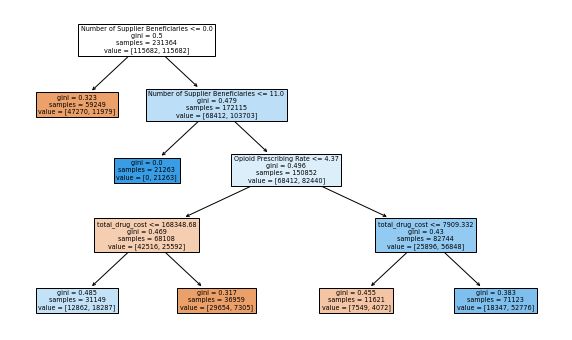

In [67]:
plt.figure(figsize=(10,6))
plot_tree(dtc, feature_names=X.columns, 
           filled=True);

In [68]:
print(f'Score on training set: {dtc.score(X_train, y_train)}')
print(f'Score on testing set: {dtc.score(X_test, y_test)}')

Score on training set: 0.7641595062326032
Score on testing set: 0.6436162527491933


In [69]:
preds=dtc.predict(X_test)

In [70]:
preds

array([0, 0, 0, ..., 0, 0, 1])

In [71]:
cm=confusion_matrix(y_test, # True values.
                 preds) 

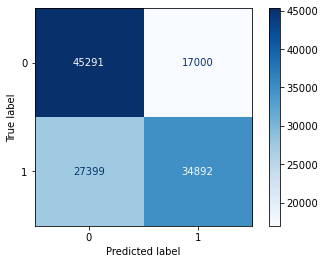

In [72]:
plot_confusion_matrix(dtc, X_test, y_test, cmap='Blues', values_format='d');

In [73]:

tn = cm[0,0]; print("True Negatives:", tn)
tp = cm[1,1]; print("True Positives:", tp)
fp = cm[0,1]; print("False Positives:", fp)
fn = cm[1,0]; print("False Negatives:", fn)

True Negatives: 45291
True Positives: 34892
False Positives: 17000
False Negatives: 27399


In [74]:
accuracy_score(y_test, preds)

0.6436162527491933

In [75]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67     62291
           1       0.67      0.56      0.61     62291

    accuracy                           0.64    124582
   macro avg       0.65      0.64      0.64    124582
weighted avg       0.65      0.64      0.64    124582



# Bagging Classifier

In [76]:
bag = BaggingClassifier(random_state = 42)

In [77]:
# Fit BaggingClassifier.
bag.fit(X_train, y_train)

# Score BaggingClassifier.
bag.score(X_test, y_test)

0.5960010274357451

In [78]:
bag.score(X_train, y_train)

0.9999092339344063

In [79]:
preds1=bag.predict(X_test)

In [80]:
cm=confusion_matrix(y_test, # True values.
                 preds1) 

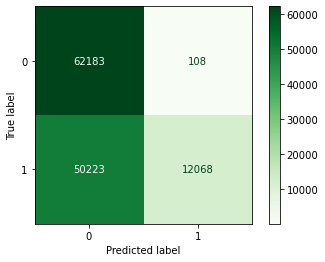

In [81]:
plot_confusion_matrix(bag, X_test, y_test, cmap='Greens', values_format='d');

In [82]:

tn = cm[0,0]; print("True Negatives:", tn)
tp = cm[1,1]; print("True Positives:", tp)
fp = cm[0,1]; print("False Positives:", fp)
fn = cm[1,0]; print("False Negatives:", fn)

True Negatives: 62183
True Positives: 12068
False Positives: 108
False Negatives: 50223


In [83]:
print(classification_report(y_test, preds1))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71     62291
           1       0.99      0.19      0.32     62291

    accuracy                           0.60    124582
   macro avg       0.77      0.60      0.52    124582
weighted avg       0.77      0.60      0.52    124582



# Random Forest Classifier

In [91]:
rf = RandomForestClassifier(n_estimators=100)

In [92]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [93]:
y_pred=rf.predict(X_test)

In [94]:
rf.score(X_train,y_train)

1.0

In [95]:
rf.score(X_test,y_test)

0.53977300091506

In [96]:
cm=confusion_matrix(y_test, # True values.
                 y_pred) 

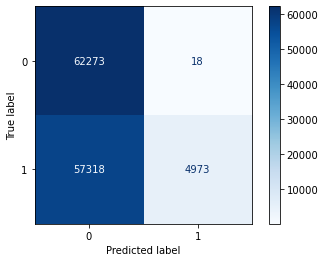

In [97]:
plot_confusion_matrix(rf, X_test, y_test, cmap='Blues', values_format='d');

In [98]:
tn = cm[0,0]; print("True Negatives:", tn)
tp = cm[1,1]; print("True Positives:", tp)
fp = cm[0,1]; print("False Positives:", fp)
fn = cm[1,0]; print("False Negatives:", fn)

True Negatives: 62273
True Positives: 4973
False Positives: 18
False Negatives: 57318


In [99]:
pd.Series(y_pred).value_counts()

0    119591
1      4991
dtype: int64

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68     62291
           1       1.00      0.08      0.15     62291

    accuracy                           0.54    124582
   macro avg       0.76      0.54      0.42    124582
weighted avg       0.76      0.54      0.42    124582



In [101]:
list(zip(X.columns, rf.feature_importances_))

[('total_drug_cost', 0.11332037215803308),
 ('total_claim_count', 0.07412281937889503),
 ('total_day_supply', 0.09192512687372036),
 ('Opioid Claim Count', 0.07574789907815896),
 ('Opioid Prescribing Rate', 0.07827308274318347),
 ('Long-Acting Opioid Claim Count', 0.04925707355377838),
 ('Long-Acting Opioid Prescribing Rate', 0.04980117145795817),
 ('Total_Payment_Sum', 0.07432482935926302),
 ('Number of Suppliers', 0.04885554594749417),
 ('Number of Supplier Beneficiaries', 0.13674605430985026),
 ('Number of Supplier Claims', 0.04258162808044559),
 ('Average Supplier Submitted Charge', 0.0522523258785035),
 ('Average Supplier Medicare Allow Amount', 0.038265858789016824),
 ('Average Supplier Medicare Payment Amount', 0.039326698973919307),
 ('Average Supplier Medicare Standard Amount', 0.03519951341777996)]

# AdaBoost Classifier

In [102]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [103]:
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [104]:
ada.score(X_test, y_test)

0.6004559246119022

In [105]:
ada.score(X_train, y_train)

1.0

In [106]:
pred=ada.predict(X_test)

In [107]:
cm=confusion_matrix(y_test, # True values.
                 pred) 

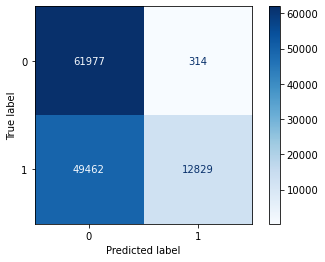

In [108]:
plot_confusion_matrix(ada, X_test, y_test, cmap='Blues', values_format='d');

In [109]:

tn = cm[0,0]; print("True Negatives:", tn)
tp = cm[1,1]; print("True Positives:", tp)
fp = cm[0,1]; print("False Positives:", fp)
fn = cm[1,0]; print("False Negatives:", fn)

True Negatives: 61977
True Positives: 12829
False Positives: 314
False Negatives: 49462


In [110]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.56      0.99      0.71     62291
           1       0.98      0.21      0.34     62291

    accuracy                           0.60    124582
   macro avg       0.77      0.60      0.53    124582
weighted avg       0.77      0.60      0.53    124582



# KNeighbors Classifier

In [111]:
knn = KNeighborsClassifier( n_neighbors=5)

In [112]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [113]:
y_preds=knn.predict(X_test)

In [114]:
print("What is the baseline or prevalance in my y_test?", 1 - y_test.mean())

What is the baseline or prevalance in my y_test? 0.5


In [115]:
accuracy_score(y_test, y_preds)

0.5036040519497199

In [116]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.50      0.93      0.65     62291
           1       0.52      0.08      0.13     62291

    accuracy                           0.50    124582
   macro avg       0.51      0.50      0.39    124582
weighted avg       0.51      0.50      0.39    124582



# KNN model using grid search

In [117]:
knn_params = {
    'n_neighbors': range(3, 10, 1),
    'metric': ['euclidean', 'manhattan']}

In [118]:
# Instantiate our GridSearchCV object.
knn_gridsearch = GridSearchCV(KNeighborsClassifier(), # What is the model we want to fit?
                              knn_params, # What is the dictionary of hyperparameters?
                              cv=2, # What number of folds in CV will we use?
                              verbose=1) #

In [119]:
knn_gridsearch.fit(X_train, y_train);

Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:  2.3min finished


In [120]:
knn_gridsearch.best_params_

{'metric': 'manhattan', 'n_neighbors': 4}

In [121]:
knn_gridsearch.best_score_

0.96519769713525

In [122]:
y_pred=knn_gridsearch.predict(X_test)

In [123]:
cm=confusion_matrix(y_test, # True values.
                 y_pred) 

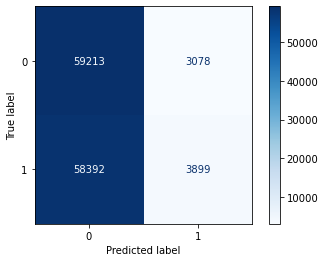

In [124]:
plot_confusion_matrix(knn_gridsearch, X_test, y_test, cmap='Blues', values_format='d');

In [125]:

tn = cm[0,0]; print("True Negatives:", tn)
tp = cm[1,1]; print("True Positives:", tp)
fp = cm[0,1]; print("False Positives:", fp)
fn = cm[1,0]; print("False Negatives:", fn)

True Negatives: 59213
True Positives: 3899
False Positives: 3078
False Negatives: 58392


In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.95      0.66     62291
           1       0.56      0.06      0.11     62291

    accuracy                           0.51    124582
   macro avg       0.53      0.51      0.39    124582
weighted avg       0.53      0.51      0.39    124582



# Bernoulli Naive Bayes 

In [127]:
model=BernoulliNB()

In [128]:
model.fit(X_train,y_train)

BernoulliNB()

In [129]:
model.score(X_train,y_train)

0.6481864075655677

In [130]:
model.score(X_test,y_test)

0.5931755791366329

In [131]:
y_pred=model.predict(X_test)

In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.72      0.64     62291
           1       0.63      0.46      0.53     62291

    accuracy                           0.59    124582
   macro avg       0.60      0.59      0.59    124582
weighted avg       0.60      0.59      0.59    124582



In [133]:
cm=confusion_matrix(y_test, # True values.
                 y_pred)

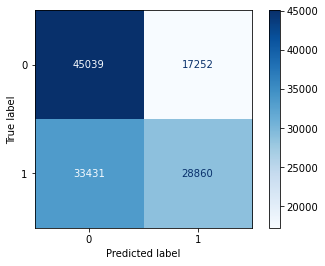

In [134]:
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format='d');

# Anomaly detection

In [236]:
isolation_forest = IsolationForest(n_estimators=100)

In [238]:
isolation_forest.fit(X_train)

IsolationForest()

In [239]:
xx = np.linspace(X_train.min(), X_train.max())

In [240]:
anomaly_score = isolation_forest.decision_function(xx)

In [241]:
outlier = isolation_forest.predict(xx)

In [242]:
outlier

array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [243]:
anomaly_score

array([ 0.15280685, -0.00683716, -0.11507853, -0.18129521, -0.23851736,
       -0.2672483 , -0.28647988, -0.30152131, -0.31189149, -0.31244099,
       -0.31629792, -0.31961843, -0.31961843, -0.32017316, -0.32239584,
       -0.32462454, -0.32685928, -0.32630003, -0.33022275, -0.33078466,
       -0.33078466, -0.33247267, -0.33190962, -0.33078466, -0.33134695,
       -0.3341641 , -0.33585897, -0.33642469, -0.33642469, -0.33642469,
       -0.33642469, -0.33869141, -0.33869141, -0.33982708, -0.33982708,
       -0.33982708, -0.33982708, -0.33982708, -0.33982708, -0.33982708,
       -0.33982708, -0.33982708, -0.33982708, -0.33982708, -0.33982708,
       -0.33982708, -0.33982708, -0.33982708, -0.33982708, -0.33982708])

# HistGradient Boosting

In [135]:
model = HistGradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')


In [136]:
# model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

yhat = model.predict(X_test)


In [137]:
yhat = model.predict(X_test)

In [138]:
cm = confusion_matrix(y_test, y_pred)

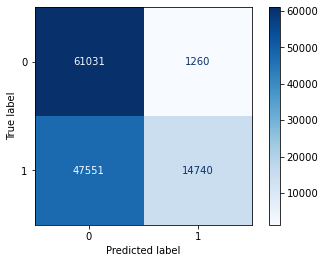

In [139]:
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format='d');

In [140]:

tn = cm[0,0]; print("True Negatives:", tn)
tp = cm[1,1]; print("True Positives:", tp)
fp = cm[0,1]; print("False Positives:", fp)
fn = cm[1,0]; print("False Negatives:", fn)

True Negatives: 45039
True Positives: 28860
False Positives: 17252
False Negatives: 33431
